In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
bank=pd.read_csv("bank-full.csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [51]:
bank.shape

(45211, 17)

In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
y = pd.get_dummies(bank['y'], drop_first = True)
y

,yes
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [14]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
bank_client=bank.iloc[:,0:16]
bank_client.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [6]:
bank_client['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
bank_client['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [8]:
bank_client['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [10]:
bank_client['default'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
bank_client['housing'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
bank_client['loan'].unique()

array(['no', 'yes'], dtype=object)

In [55]:
bank_client['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [56]:
bank_client['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [57]:
bank_client['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
bank_client['job']=labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital']=labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education']=labelencoder_X.fit_transform(bank_client['education'])
bank_client['default']=labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing']=labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan']=labelencoder_X.fit_transform(bank_client['loan'])
bank_client['contact']=labelencoder_X.fit_transform(bank_client['contact'])
bank_client['month']=labelencoder_X.fit_transform(bank_client['month'])
bank_client['poutcome']=labelencoder_X.fit_transform(bank_client['poutcome'])

In [59]:
print('max:',bank_client['age'].max())
print('min:',bank_client['age'].min())

max: 95
min: 18


In [7]:
def age(dataframe):
    dataframe.loc[bank_client['age']<=32,'age']=1
    dataframe.loc[(bank_client['age']>32)&(bank_client['age']<=47),'age']=2
    dataframe.loc[(bank_client['age']>47)&(bank_client['age']<=70),'age']=3
    dataframe.loc[(bank_client['age']>70)&(bank_client['age']<=95),'age']=4
    return dataframe
age(bank_client)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,2,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,4,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,4,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,3,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [11]:
x=bank_client
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,2,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,4,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,4,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,3,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [12]:
A=pd.concat([x,y],axis=1)
A

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,yes
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,2,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,4,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,4,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,3,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [25]:
A.to_csv('bank1.csv', index = None, header=True)


In [10]:
A.corr()['yes']

age          0.002922
job          0.040438
marital      0.045588
education    0.066241
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact     -0.148395
day         -0.028348
month       -0.024471
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome    -0.077840
yes          1.000000
Name: yes, dtype: float64

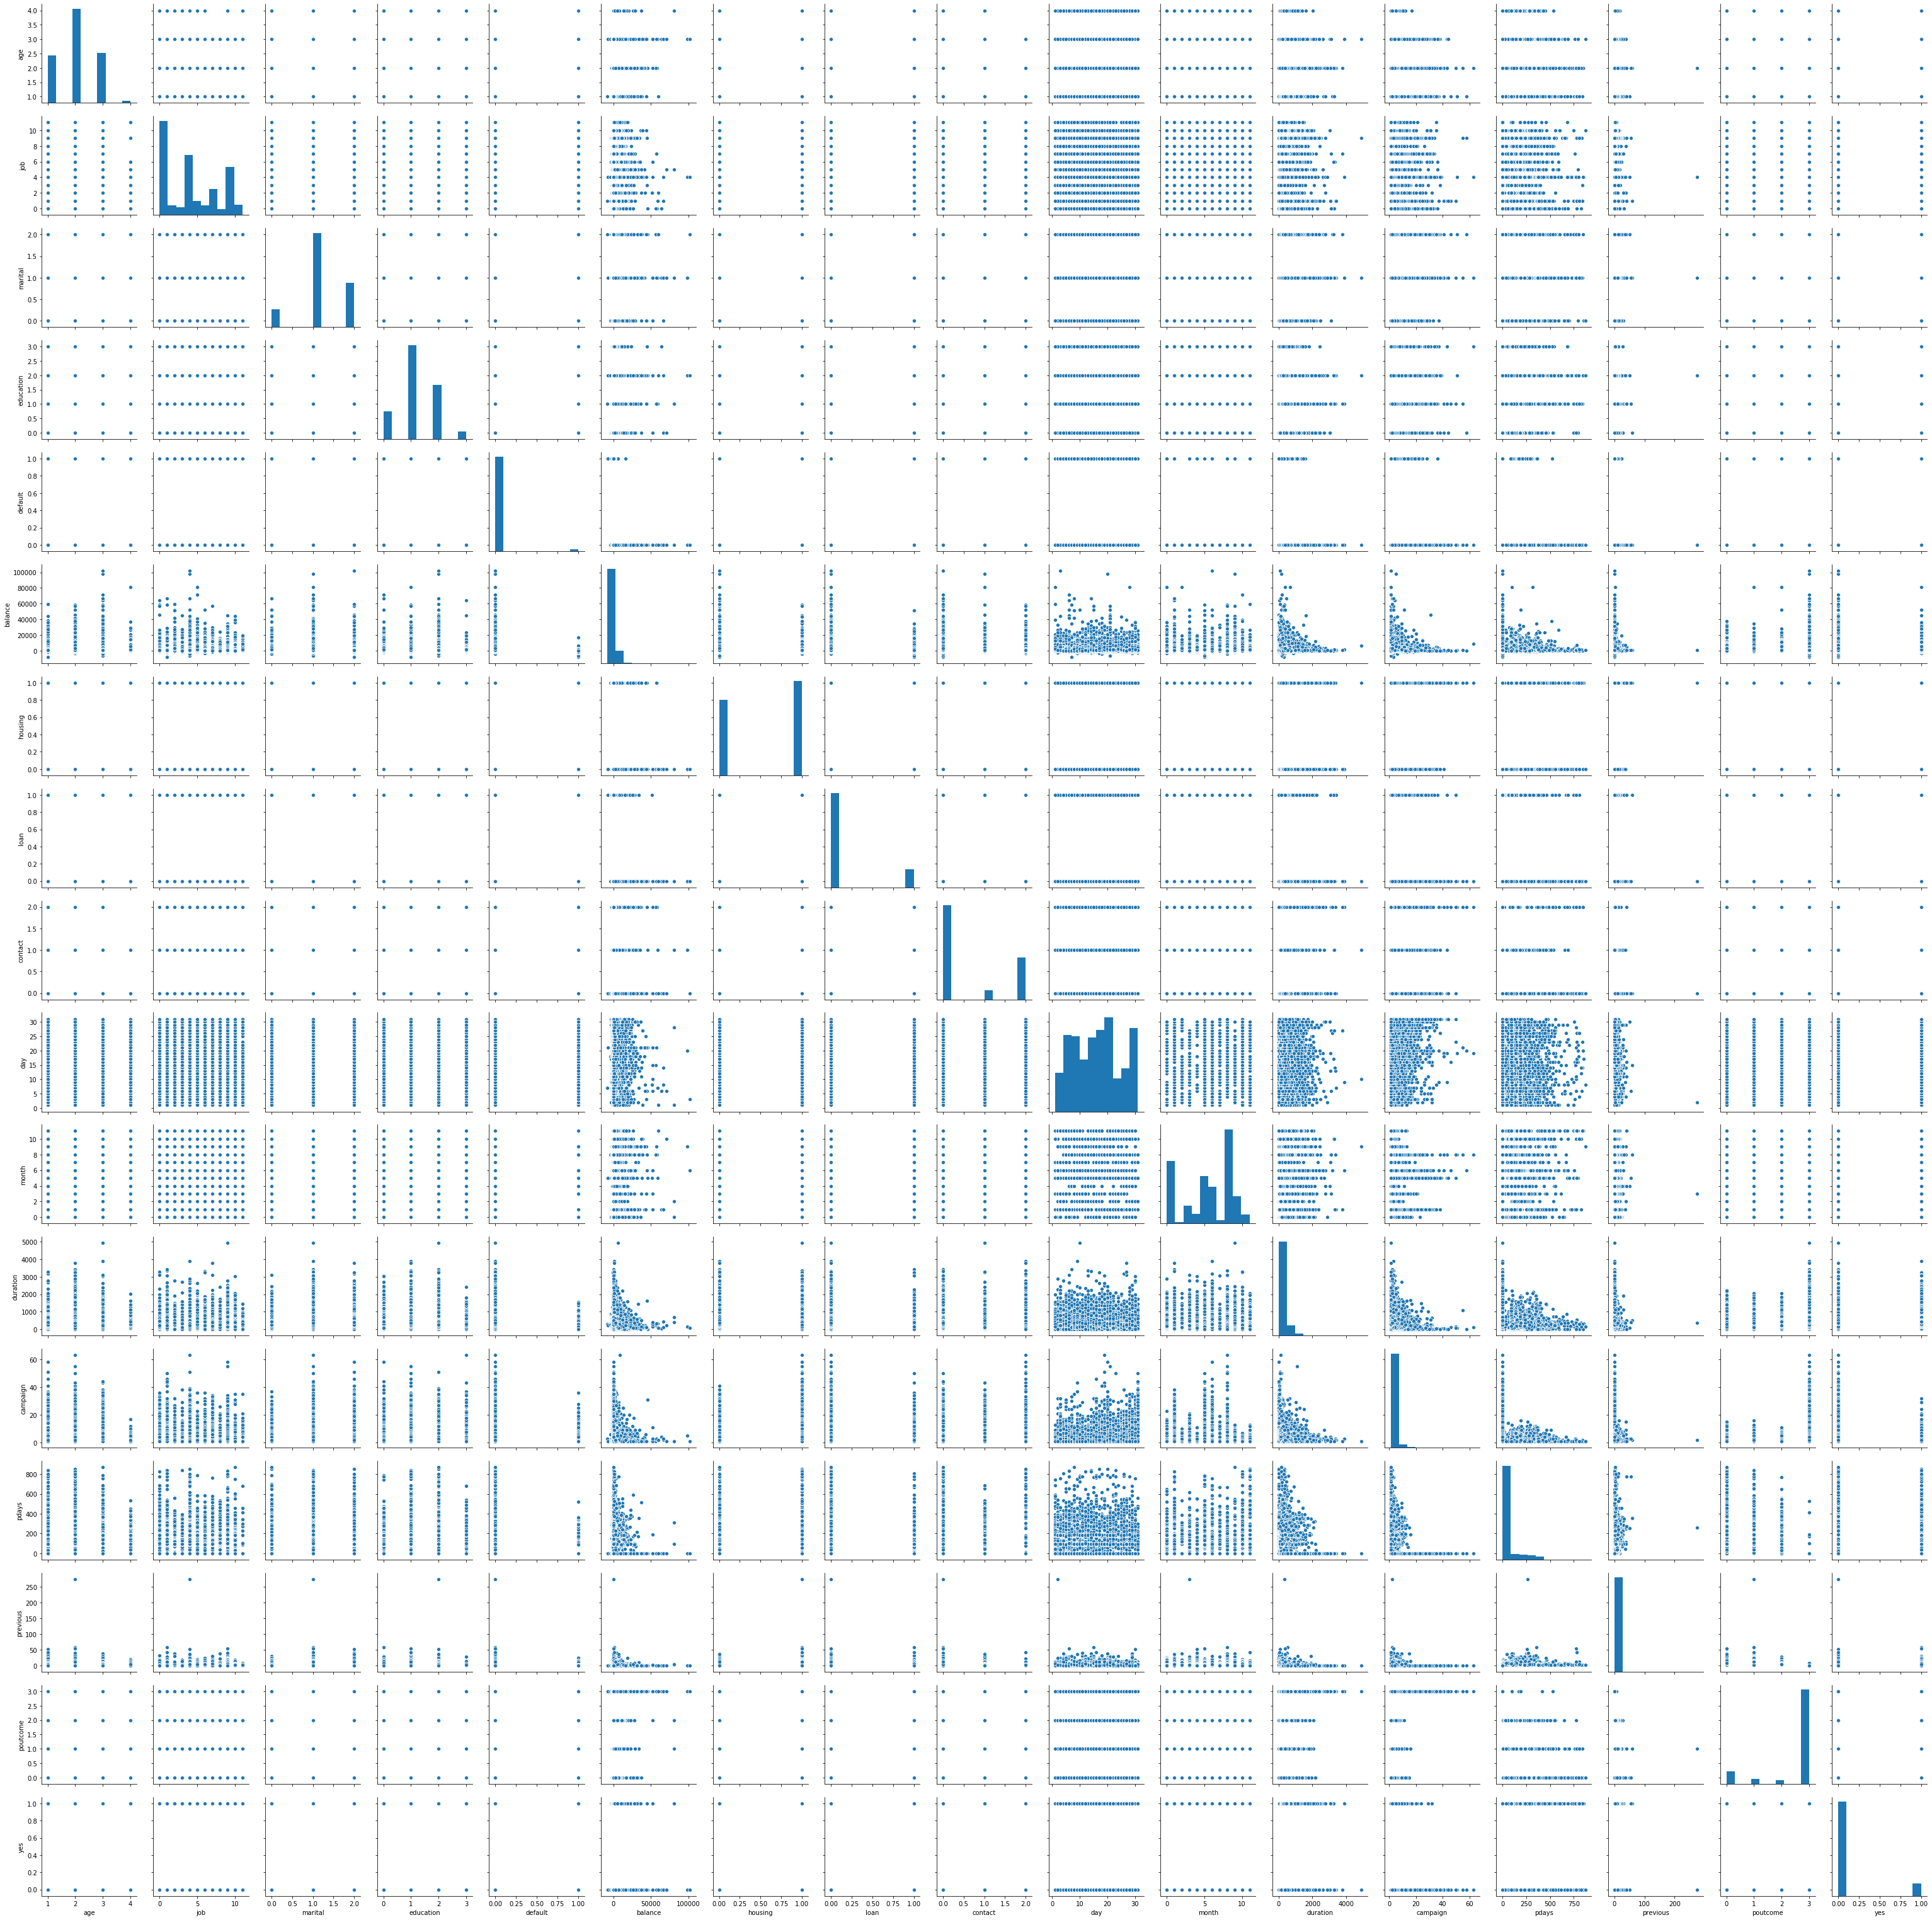

In [13]:
sns.pairplot(A)

In [14]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(train_x,train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred=logmodel.predict(test_x)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,y_pred)

array([[11712,   257],
       [ 1266,   329]])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.887717487466824

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y,y_pred)

0.5923987280621228